In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
# print(plt.style.available)

import mlgrad.funcs as funcs
# import mlgrad.avragg as avragg
# import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad.af import averaging_function
import mlgrad.cluster as cluster


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

In [3]:
df = pd.read_csv("data/hygdata_v3-abridged.csv",  sep=',', usecols=['mag','ci','lum','T'])
df.dropna(inplace=True)
print(df.columns)
df

Index(['mag', 'ci', 'lum', 'T'], dtype='object')


,mag,ci,lum,T
76189,6.51,1.200,91.790979,4308.727009
107312,8.32,0.884,14.736692,5039.699311
62985,10.36,0.753,2.412126,5426.533872
114671,8.81,1.077,23.507151,4565.156303
51601,7.12,1.450,173.300574,3870.295640
...,...,...,...,...
119603,13.01,1.500,0.002946,3793.506494
119607,11.72,1.540,0.003436,3734.317309
119610,16.10,1.870,0.000088,3310.347932
119611,12.82,1.640,0.002224,3594.399505


In [4]:
# T = df['T'].values
lum = df['lum'].values
ci = df['ci'].values
iii = lum > 0
lum = lum[iii]
# T = np.log(T[iii])
lum = np.log(lum)
T = np.log(4600 * (10.92/(ci+1.7)+10.92/(ci+0.62)))
X = np.c_[lum,T] 

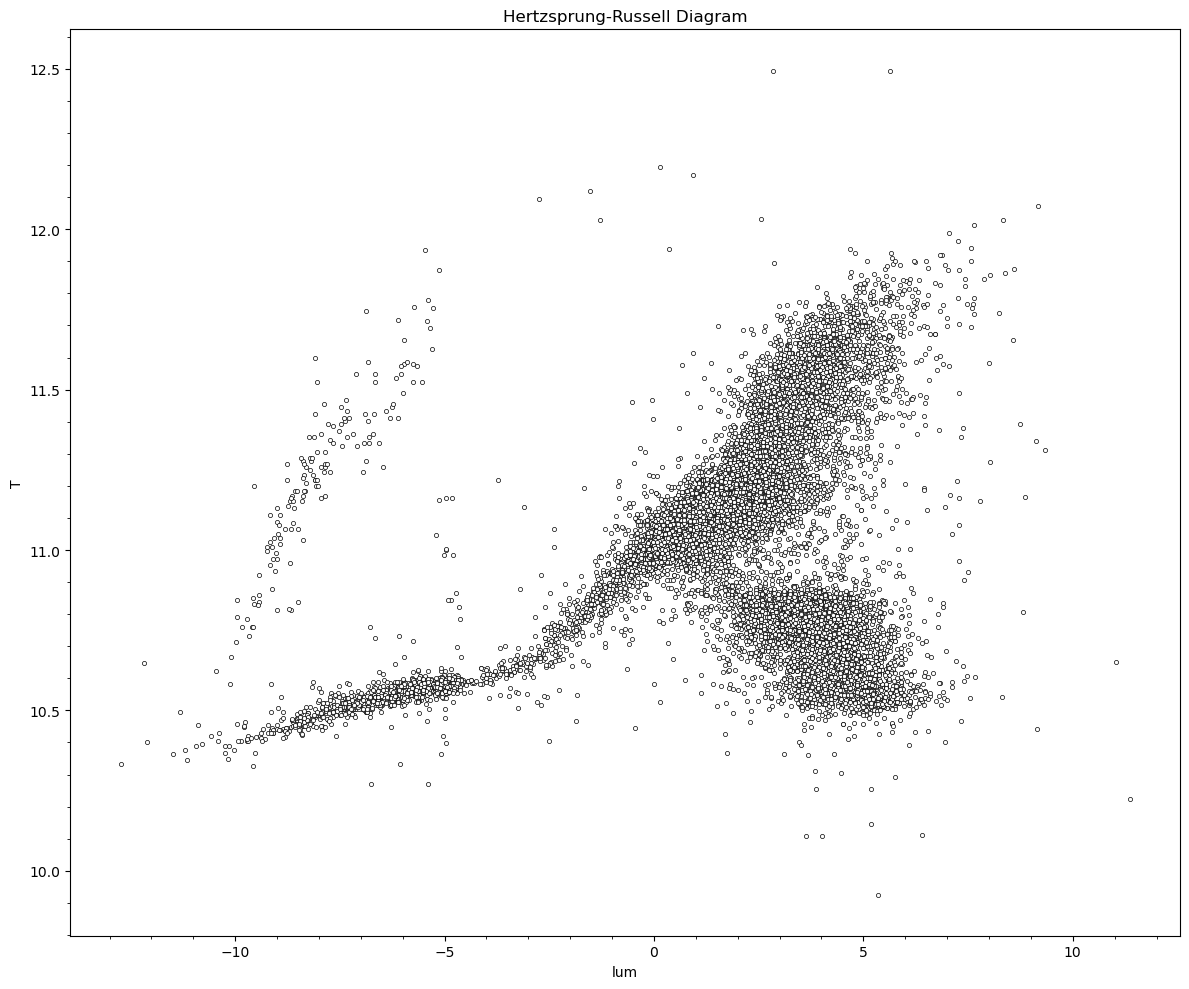

In [66]:
plt.figure(figsize=(12,10))
plt.scatter(lum, T, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('lum')
plt.ylabel('T')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [110]:
avrfunc = averaging_function("WM", 
                             rhofunc=funcs.QuantileFunc(0.95, funcs.SoftAbs_Sqrt(0.001)))
# avrfunc = averaging_function("WMZ", kwds={"alpha":3.5})
hcd = cluster.RKMeansMahalanobis(7, avrfunc)

In [111]:
hcd.fit(X)

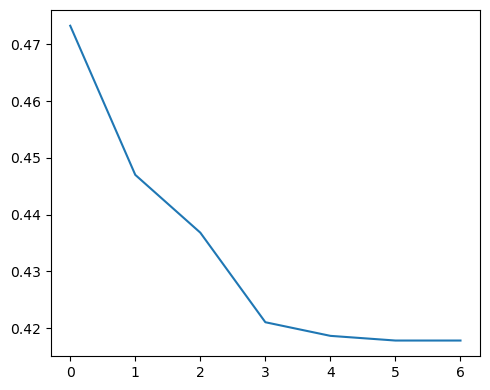

In [112]:
plt.figure(figsize=(5,4))
plt.plot(hcd.qvals2)
plt.show()

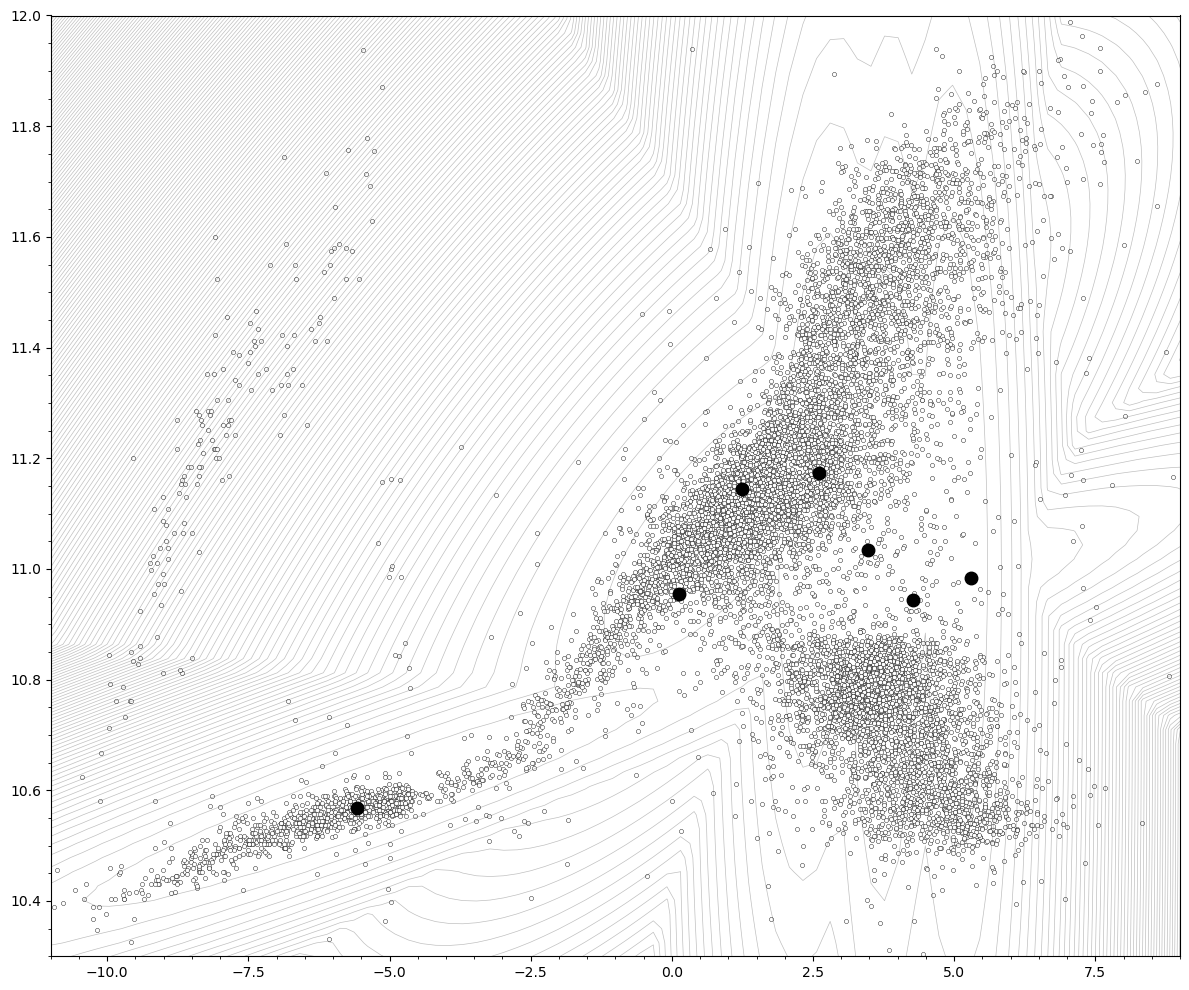

In [113]:
plt.figure(figsize=(12,10))
plt.contour(DD, origin='lower', extent=(lum.min(),lum.max(),T.min(),T.max()), 
            levels=np.linspace(DD.min(),DD.max(),300), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=9, linewidth=0.3)
plt.scatter(hcd.c[:,0], hcd.c[:,1], c='k', edgecolors='k', s=81)
plt.xlim(-11,9)
plt.ylim(10.3,12)
plt.minorticks_on()
plt.show()

### Среднее арифметическое

In [93]:
km = cluster.KMeansMahalanobis(7)

In [94]:
km.fit(X)

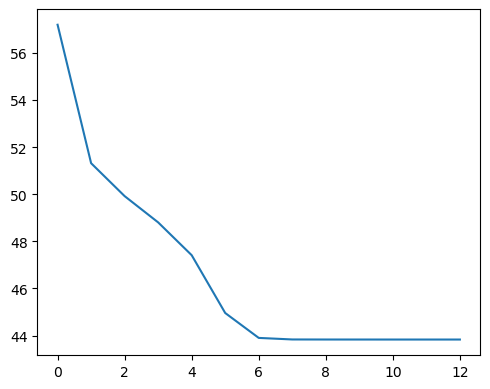

In [95]:
plt.figure(figsize=(5,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.qvals2)
plt.show()

In [96]:
xrange1 = np.linspace(lum.min(),lum.max(), 100)
xrange2 = np.linspace(T.min(),T.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D2 = km.eval_dists(XX)
# C = hcd.evaluate(XX), avrfunc
# CC = np.asarray(C).reshape(XX1.shape)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

7.637798901356579e-05 46.79101268821094


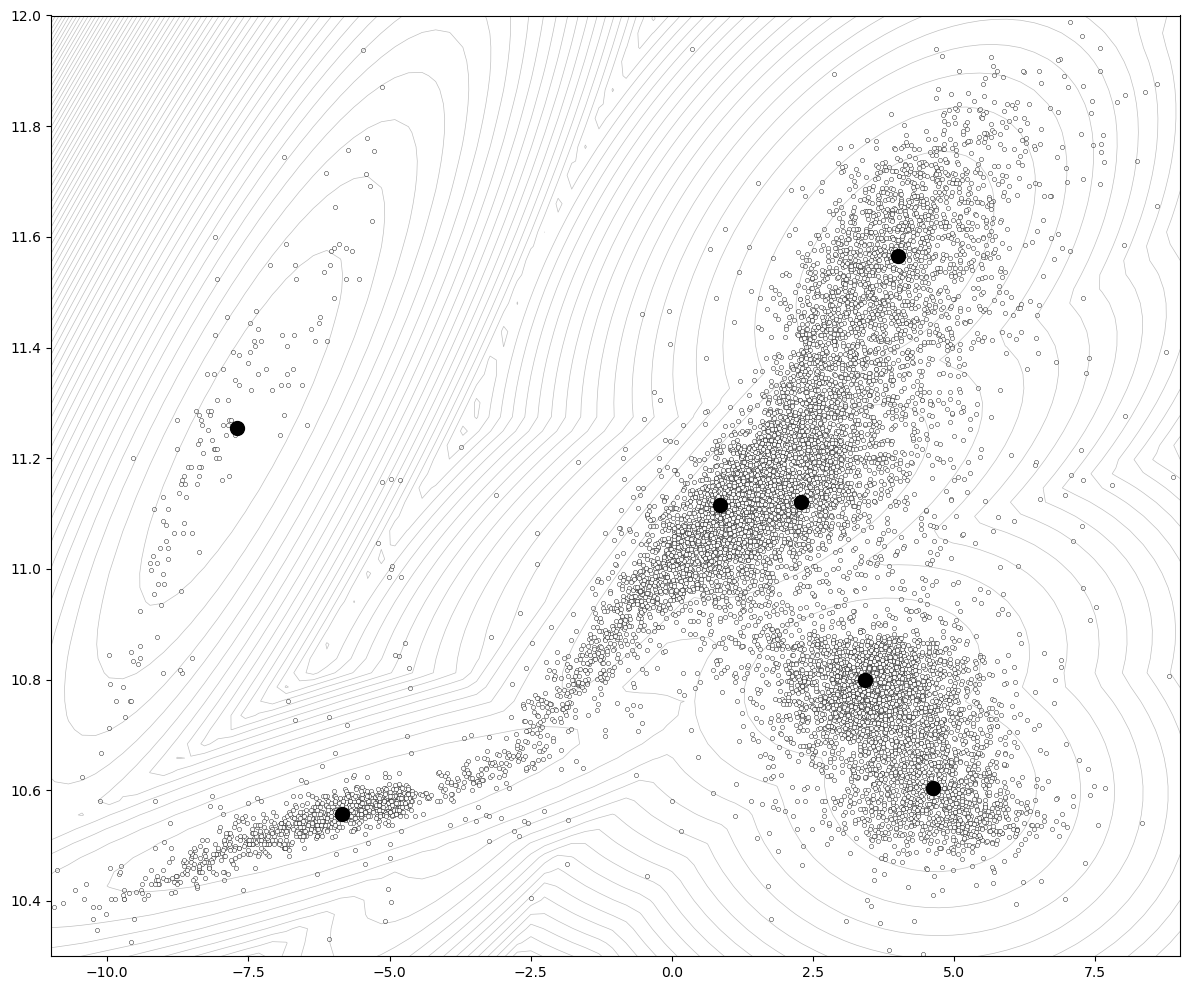

In [97]:
plt.figure(figsize=(12,10))
plt.contour(DD2, origin='lower', extent=(lum.min(),lum.max(),T.min(),T.max()), 
            levels=np.linspace(0.,30,100), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=9, linewidth=0.3)
plt.scatter(km.c[:,0], km.c[:,1], c='k', edgecolors='k', s=100)
plt.xlim(-11,9)
plt.ylim(10.3,12)
plt.show()